# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [2]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [4]:
df_pew_research = pd.read_csv(r"data/pew-raw.csv" )

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [12]:
df_pew_research.head(5)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [36]:

# Display the first few rows
print("First 5 rows using head():")
print(df.head())

# Display the last few rows
print("\nLast 5 rows using tail():")
print(df.tail())

# Access specific rows using iloc (e.g., first 3 rows)
print("\nFirst 3 rows using iloc:")
print(df.iloc[:3])

# Access specific rows and columns using loc (e.g., rows 0 to 2 and all columns)
print("\nRows 0 to 2 using loc:")
print(df.loc[0:2])


First 5 rows using head():
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Last 5 rows using tail():
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121  

***What does not seem right in the above dataframe?***

The Pew dataset doesn't look quite right because the income groups are used as column headers instead of values in a column, which makes the data harder to analyze. It’s in a wide format, but for better analysis, it should be in a long format where each row shows a religion and its corresponding income group. This layout makes it difficult to filter, group, or visualize the data properly.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [41]:

# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['religion'], var_name='income', value_name='count')

# Display the reshaped DataFrame
print(df_melted.head())


            religion  income  count
0           Agnostic   <$10k     27
1            Atheist   <$10k     12
2           Buddhist   <$10k     27
3           Catholic   <$10k    418
4  Dont know/refused   <$10k     15


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [22]:
import pandas as pd

# Define the file path
file_path = r"data/billboard.csv"

# Load the dataset using unicode_escape encoding
df = pd.read_csv(file_path, encoding='unicode_escape')

# Display the first few rows
print(df.head())


   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

2. Observe the first few rows of the dataset.

In [24]:
print(df.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

***What is wrong with the above dataset?***

Each week's chart position is stored in a separate column (like x1st.week, x2nd.week, etc.), which makes the data wide and hard to analyze. The dataset is too wide — it should be reshaped so that each row represents a song's position in a specific week, not all weeks in separate columns.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [50]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/billboard.csv', encoding='unicode_escape')

# Display the first few rows to identify the actual column names
print("First few rows of the dataset:")
print(df.head())

# Use melt to reshape the dataset using the correct column names
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Display the reshaped DataFrame
print("\nReshaped DataFrame:")
print(df_melted.head())



First few rows of the dataset:
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [56]:

# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Clean the 'week' column to contain only the week number
df_melted['week'] = df_melted['week'].str.extract(r'(\d+)').astype(float)

# Drop rows where 'week' is NaN
df_melted = df_melted.dropna(subset=['week'])

# Convert 'week' to integer
df_melted['week'] = df_melted['week'].astype(int)

# Display the reshaped DataFrame
print(df_melted.head())



     year      artist.inverted                                  track  time  \
634  2000      Destiny's Child               Independent Women Part I  3:38   
635  2000              Santana                           Maria, Maria  4:18   
636  2000        Savage Garden                     I Knew I Loved You  4:07   
637  2000              Madonna                                  Music  3:45   
638  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

    date.entered  week rank  
634   2000-09-23     1   78  
635   2000-02-12     1   15  
636   1999-10-23     1   71  
637   2000-08-12     1   41  
638   2000-08-05     1   57  


5. Now let's inspect the ***Week*** column in the dataframe.

In [58]:

# Inspect the 'week' column
unique_weeks = df_melted['week'].unique()
week_dtype = df_melted['week'].dtype
week_stats = df_melted['week'].describe()

unique_weeks, week_dtype, week_stats


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76]),
 dtype('int32'),
 count    24092.000000
 mean        38.500000
 std         21.937866
 min          1.000000
 25%         19.750000
 50%         38.500000
 75%         57.250000
 max         76.000000
 Name: week, dtype: float64)

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


In [60]:


# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Clean the 'week' column to contain only the week number
df_melted['week'] = df_melted['week'].str.extract(r'(\d+)').astype(float)

# Drop rows where 'week' is NaN
df_melted = df_melted.dropna(subset=['week'])

# Convert 'week' column to integer
df_melted['week'] = df_melted['week'].astype(int)

# Convert 'date.entered' to datetime
df_melted['date.entered'] = pd.to_datetime(df_melted['date.entered'])

# Calculate 'date.ranked' by adding 'week' as a timedelta to 'date.entered'
df_melted['date.ranked'] = df_melted['date.entered'] + pd.to_timedelta(df_melted['week'], unit='W')

# Display the first few rows of the updated DataFrame
print(df_melted.head())



     year      artist.inverted                                  track  time  \
634  2000      Destiny's Child               Independent Women Part I  3:38   
635  2000              Santana                           Maria, Maria  4:18   
636  2000        Savage Garden                     I Knew I Loved You  4:07   
637  2000              Madonna                                  Music  3:45   
638  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

    date.entered  week rank date.ranked  
634   2000-09-23     1   78  2000-09-30  
635   2000-02-12     1   15  2000-02-19  
636   1999-10-23     1   71  1999-10-30  
637   2000-08-12     1   41  2000-08-19  
638   2000-08-05     1   57  2000-08-12  


***What is the problem with the calculation above?***

The problem is that the calculation adds 1 week too many, it treats the first week as starting after the date.entered, but actually, week 1 should be the same as the date.entered.

7. Let's only keep necessary columns

In [63]:


# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Clean the 'week' column to contain only the week number
df_melted['week'] = df_melted['week'].str.extract(r'(\d+)').astype(float)

# Drop rows where 'week' is NaN
df_melted = df_melted.dropna(subset=['week'])

# Convert 'week' to integer
df_melted['week'] = df_melted['week'].astype(int)

# Calculate the date at which the song ranked the number shown per row
df_melted['date.entered'] = pd.to_datetime(df_melted['date.entered'])
df_melted['date.ranked'] = df_melted['date.entered'] + pd.to_timedelta(df_melted['week'] - 1, unit='W')

# Keep only necessary columns
df_final = df_melted[['year', 'artist.inverted', 'track', 'week', 'rank', 'date.ranked']]

# Display the final DataFrame
print(df_final.head())



     year      artist.inverted                                  track  week  \
634  2000      Destiny's Child               Independent Women Part I     1   
635  2000              Santana                           Maria, Maria     1   
636  2000        Savage Garden                     I Knew I Loved You     1   
637  2000              Madonna                                  Music     1   
638  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)     1   

    rank date.ranked  
634   78  2000-09-23  
635   15  2000-02-12  
636   71  1999-10-23  
637   41  2000-08-12  
638   57  2000-08-05  


8. How to rename your columns?

To rename columns in a pandas DataFrame, you use the .rename() function and pass a dictionary that maps the old column names to the new ones. For example, if you want to rename the column 'artist.inverted' to 'artist' and 'track' to 'song', you would write df.rename(columns={'artist.inverted': 'artist', 'track': 'song'}, inplace=True). This tells pandas to update the column names directly in the original DataFrame

Display the dataframe

In [66]:

# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Clean the 'week' column to contain only the week number
df_melted['week'] = df_melted['week'].str.extract(r'(\d+)').astype(float)

# Drop rows where 'week' is NaN
df_melted.dropna(subset=['week'], inplace=True)

# Convert 'week' to integer
df_melted['week'] = df_melted['week'].astype(int)

# Calculate the 'date.ranked' column
df_melted['date.entered'] = pd.to_datetime(df_melted['date.entered'])
df_melted['date.ranked'] = df_melted['date.entered'] + pd.to_timedelta(df_melted['week'] - 1, unit='W')

# Keep only the necessary columns
df_final = df_melted[['year', 'artist.inverted', 'track', 'week', 'rank', 'date.ranked']]

# Display the final DataFrame
print(df_final.head())



     year      artist.inverted                                  track  week  \
634  2000      Destiny's Child               Independent Women Part I     1   
635  2000              Santana                           Maria, Maria     1   
636  2000        Savage Garden                     I Knew I Loved You     1   
637  2000              Madonna                                  Music     1   
638  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)     1   

    rank date.ranked  
634   78  2000-09-23  
635   15  2000-02-12  
636   71  1999-10-23  
637   41  2000-08-12  
638   57  2000-08-05  


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [68]:

# Use melt to reshape the dataset
df_melted = pd.melt(df, id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

# Clean the 'week' column to contain only the week number
df_melted['week'] = df_melted['week'].str.extract(r'(\d+)').astype(float)

# Drop rows where 'week' is NaN
df_melted.dropna(subset=['week'], inplace=True)

# Convert 'week' column to integer
df_melted['week'] = df_melted['week'].astype(int)

# Calculate the date at which the song ranked the number shown per row
df_melted['date.entered'] = pd.to_datetime(df_melted['date.entered'])
df_melted['date.ranked'] = df_melted['date.entered'] + pd.to_timedelta(df_melted['week'] - 1, unit='W')

# Drop rows with NaN values in 'rank' column
df_cleaned = df_melted.dropna(subset=['rank'])

# Display the cleaned DataFrame
print(df_cleaned.head())



     year      artist.inverted                                  track  time  \
634  2000      Destiny's Child               Independent Women Part I  3:38   
635  2000              Santana                           Maria, Maria  4:18   
636  2000        Savage Garden                     I Knew I Loved You  4:07   
637  2000              Madonna                                  Music  3:45   
638  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

    date.entered  week rank date.ranked  
634   2000-09-23     1   78  2000-09-23  
635   2000-02-12     1   15  2000-02-12  
636   1999-10-23     1   71  1999-10-23  
637   2000-08-12     1   41  2000-08-12  
638   2000-08-05     1   57  2000-08-05  


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [88]:
import pandas as pd
import numpy as np
# Load the dataset from 'cars 1.csv' using semicolon as the delimiter
df_cars = pd.read_csv('data/cars.csv', delimiter=';')

# Display the first few rows to observe its structure
print(df_cars.head())



                         Car     MPG Cylinders Displacement Horsepower  \
0                     STRING  DOUBLE       INT       DOUBLE     DOUBLE   
1  Chevrolet Chevelle Malibu     NaN         8        307.0      130.0   
2          Buick Skylark 320    15.0         8        350.0        NaN   
3         Plymouth Satellite     NaN         8        318.0      150.0   
4              AMC Rebel SST    16.0         8          NaN      150.0   

   Weight Acceleration Model Origin  
0  DOUBLE       DOUBLE   INT    CAT  
1   3504.         12.0    70     US  
2   3693.         11.5    70     US  
3   3436.         11.0    70     US  
4     NaN         12.0    70     US  


First Row seems to be the datatype, we need to remove it

In [90]:

# Remove the first row (data types)
df_cars = df_cars.iloc[1:]

# Display the cleaned DataFrame
print(df_cars.head())



                         Car   MPG Cylinders Displacement Horsepower Weight  \
1  Chevrolet Chevelle Malibu   NaN         8        307.0      130.0  3504.   
2          Buick Skylark 320  15.0         8        350.0        NaN  3693.   
3         Plymouth Satellite   NaN         8        318.0      150.0  3436.   
4              AMC Rebel SST  16.0         8          NaN      150.0    NaN   
5                Ford Torino  17.0         8        302.0      140.0  3449.   

  Acceleration Model Origin  
1         12.0    70     US  
2         11.5    70     US  
3         11.0    70     US  
4         12.0    70     US  
5         10.5    70     US  


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [92]:

# Remove the first row (data types)
df = df.iloc[1:]

# Display the number of null values in each column
null_values = df.isnull().sum()
print(null_values)



year                 0
artist.inverted      0
track                0
time                 0
genre                0
                  ... 
x72nd.week         314
x73rd.week         314
x74th.week         314
x75th.week         314
x76th.week         314
Length: 83, dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [94]:

# Remove the first row (data types)
df_cars = df_cars.iloc[1:]

# Calculate the percentage of missing values in each column
missing_percentage = df_cars.isnull().sum() / len(df_cars) * 100

# Display the percentage of missing values
print("Percentage of Missing Values: {missing_percentage:.2f}%")

# total_missing_percent = (cars_df.isnull().sum().sum() / cars_df.size) * 100

# print(f"Total missing percentage in the DataFrame: {total_missing_percent:.2f}%")


Percentage of Missing Values: {missing_percentage:.2f}%


In [98]:

# Remove the first row (data types)
df = df.iloc[1:]

# Calculate the total percentage of missing values
total_missing = df.isnull().sum().sum()
total_values = np.product(df.shape)
missing_percentage = (total_missing / total_values) * 100

# Print the result
print(f"Total % of Missing values is {missing_percentage:.2f}")



Total % of Missing values is 0.19


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [100]:

# Remove the first row (data types)
df = df.iloc[1:]

# Drop all rows with null values
df_cleaned = df.dropna()

# Display the resulting DataFrame shape
print(f"The shape of the DataFrame after dropping rows with null values is {df_cleaned.shape}.")


The shape of the DataFrame after dropping rows with null values is (401, 9).


Lets also check dropping the columns

In [102]:

# Remove the first row (data types)
df = df.iloc[1:]

# Drop all columns with null values
df_cleaned_columns = df.dropna(axis=1)

# Display the resulting DataFrame shape
print(f"The shape of the DataFrame after dropping columns with null values is {df_cleaned_columns.shape}.")


The shape of the DataFrame after dropping columns with null values is (406, 5).


Let's observe how many columns we lost

In [104]:

# Remove the first row (data types)
df = df.iloc[1:]

# Get the initial number of columns
initial_columns = df.shape[1]

# Drop all columns with null values
df_cleaned_columns = df.dropna(axis=1)

# Get the number of columns after dropping
final_columns = df_cleaned_columns.shape[1]

# Calculate the number of columns dropped
columns_dropped = initial_columns - final_columns

print(f"The number of columns dropped is {columns_dropped}.")



The number of columns dropped is 4.


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [106]:

# Remove the first row (data types)
df = df.iloc[1:]

# Display the number of missing values in the 'MPG' column before imputation
missing_values_before = df['MPG'].isnull().sum()
print(f"Number of missing values in 'MPG' column before imputation: {missing_values_before}")

# Fill missing values in the 'MPG' column with 0
df['MPG'] = df['MPG'].fillna(0)

# Display the number of missing values in the 'MPG' column after imputation
missing_values_after = df['MPG'].isnull().sum()
print(f"Number of missing values in 'MPG' column after imputation: {missing_values_after}")


Number of missing values in 'MPG' column before imputation: 2
Number of missing values in 'MPG' column after imputation: 0


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

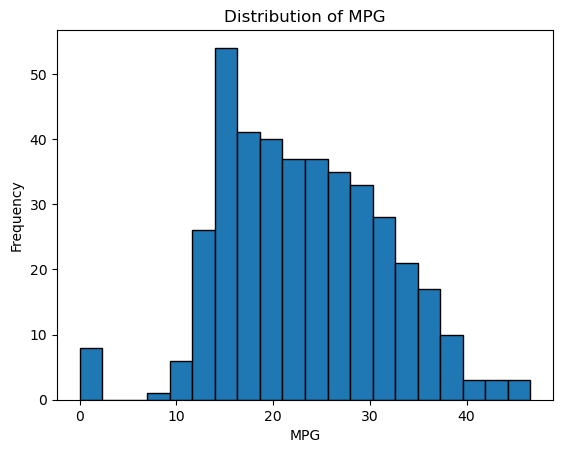

Mean of MPG: 23.096277915632754
Median of MPG: 22.5
Number of missing values in 'MPG' column after advanced imputation: 0


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove the first row (data types)
df = df.iloc[1:]

# Convert the 'MPG' column to numeric, forcing errors to NaN
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')

# Plot the distribution of the 'MPG' column
plt.hist(df['MPG'].dropna(), bins=20, edgecolor='k')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

# Calculate mean and median of the 'MPG' column
mpg_mean = df['MPG'].mean()
mpg_median = df['MPG'].median()

print(f"Mean of MPG: {mpg_mean}")
print(f"Median of MPG: {mpg_median}")

# Advanced imputation strategy: fill missing 'MPG' values with the median MPG of cars with similar attributes
df['MPG'] = df.groupby(['Cylinders', 'Origin', 'Model'])['MPG'].transform(lambda x: x.fillna(x.median()))

# Display the number of missing values in the 'MPG' column after advanced imputation
missing_values_after = df['MPG'].isnull().sum()
print(f"Number of missing values in 'MPG' column after advanced imputation: {missing_values_after}")



If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [118]:

# Remove the first row (data types)
df = df.iloc[1:]

# Convert relevant columns to numeric types
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')
df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Acceleration'] = pd.to_numeric(df['Acceleration'], errors='coerce')
df['Model'] = pd.to_numeric(df['Model'], errors='coerce')

# Display the data types to confirm conversion
print(df.dtypes)

# Display the first few rows to confirm the changes
print(df.head())


Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model             int64
Origin           object
dtype: object
                  Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
2   Buick Skylark 320  15.0          8         350.0         NaN  3693.0   
3  Plymouth Satellite   NaN          8         318.0       150.0  3436.0   
4       AMC Rebel SST  16.0          8           NaN       150.0     NaN   
5         Ford Torino  17.0          8         302.0       140.0  3449.0   
6    Ford Galaxie 500   NaN          8         429.0         NaN  4341.0   

   Acceleration  Model Origin  
2          11.5     70     US  
3          11.0     70     US  
4          12.0     70     US  
5          10.5     70     US  
6          10.0     70     US  


Now let's see what is the mean of the MPG column

In [120]:

# Remove the first row (data types)
df = df.iloc[1:]

# Convert relevant columns to numeric types
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')
df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Acceleration'] = pd.to_numeric(df['Acceleration'], errors='coerce')
df['Model'] = pd.to_numeric(df['Model'], errors='coerce')

# Calculate the mean of the 'MPG' column
mean_mpg = df['MPG'].mean()

print(f"The mean of the 'MPG' column is {mean_mpg:.2f}.")



The mean of the 'MPG' column is 23.10.


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [124]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./cars.csv', delimiter=';')

# Remove the first row (data types)
df = df.iloc[1:]

# Convert relevant columns to numeric types
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')
df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Acceleration'] = pd.to_numeric(df['Acceleration'], errors='coerce')
df['Model'] = pd.to_numeric(df['Model'], errors='coerce')

# Calculate the mean of the 'MPG' column
mpg_mean = df['MPG'].mean()
print(f"Mean of MPG: {mpg_mean}")

# Impute missing values in the 'MPG' column using the mean
df['MPG'] = df['MPG'].fillna(mpg_mean)

# Display the number of missing values in the 'MPG' column after imputation
missing_values_after = df['MPG'].isnull().sum()
print(f"Number of missing values in 'MPG' column after imputation: {missing_values_after}")




Mean of MPG: 23.096277915632754
Number of missing values in 'MPG' column after imputation: 0


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [126]:
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [132]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('data/cars.csv', delimiter=';')

# Remove the first row (data types)
df = df.iloc[1:]

# Convert relevant columns to numeric types
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'MPG' column and transform the data
df['MPG'] = imputer.fit_transform(df[['MPG']])

# Display the transformed dataset
print(df.head())


                         Car        MPG Cylinders Displacement Horsepower  \
1  Chevrolet Chevelle Malibu  23.096278         8        307.0      130.0   
2          Buick Skylark 320  15.000000         8        350.0        NaN   
3         Plymouth Satellite  23.096278         8        318.0      150.0   
4              AMC Rebel SST  16.000000         8          NaN      150.0   
5                Ford Torino  17.000000         8        302.0      140.0   

  Weight Acceleration Model Origin  
1  3504.         12.0    70     US  
2  3693.         11.5    70     US  
3  3436.         11.0    70     US  
4    NaN         12.0    70     US  
5  3449.         10.5    70     US  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





### Load the Dataset

In [138]:
import pandas as pd

diabetes = pd.read_csv("data/diabetes.csv")
print(diabetes.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

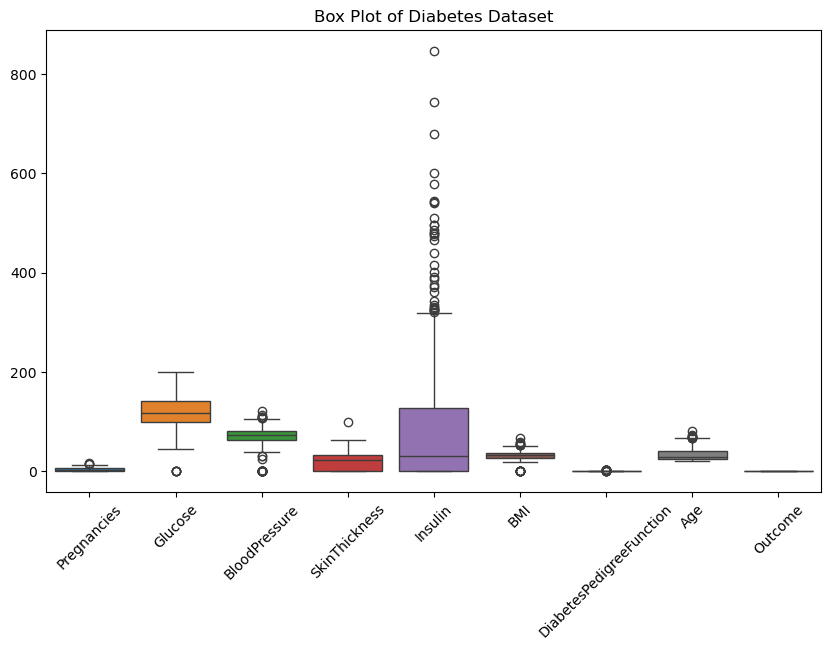

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes)
plt.xticks(rotation=45)
plt.title("Box Plot of Diabetes Dataset")
plt.show()


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

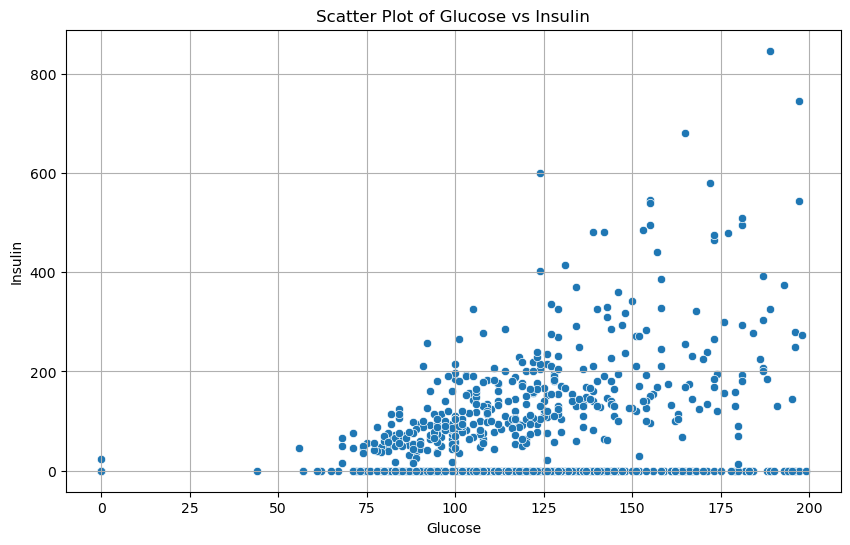

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
df = pd.read_csv("data/diabetes.csv")

# Basic scatter plot between Glucose and Insulin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='Insulin')
plt.title("Scatter Plot of Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.grid(True)
plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [144]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(diabetes.select_dtypes(include='number'))
abs_z_scores = abs(z_scores)

# Keep only data points where all z-scores are below threshold
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetes_z_filtered = diabetes[filtered_entries]
print("After Z-score filtering:", diabetes_z_filtered.shape)


After Z-score filtering: (688, 9)


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [147]:
from scipy.stats import zscore
import pandas as pd

# Load the dataset
df = pd.read_csv("data/diabetes.csv")

# Compute z-scores
z_scores = zscore(df)

# Convert to DataFrame for readability
z_df = pd.DataFrame(z_scores, columns=df.columns)

# Find rows with any value greater than +2 or less than -2
outliers = df[(z_df > 2).any(axis=1)]
print("Rows where Z > 2:\n", outliers)


Rows where Z > 2:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
22             7      196             90              0        0  39.8   
..           ...      ...            ...            ...      ...   ...   
748            3      187             70             22      200  36.4   
750            4      136             70              0        0  31.2   
753            0      181             88             44      510  43.3   
759            6      190             92              0        0  35.5   
763           10      101             76             48      180  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  


Identifying rows that have values more than 2 standard deviations away from the mean, which are statistically unusual or extreme. These are considered potential outliers, especially in normally distributed data.

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [149]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

diabetes_iqr_filtered = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After IQR filtering:", diabetes_iqr_filtered.shape)


After IQR filtering: (639, 9)


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [151]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds for each feature
print("Lower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)



Lower Bound:
 Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

Upper Bound:
 Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [161]:
# Create a mask for rows where all values are within bounds
mask = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Apply the mask to keep only non-outlier rows
df_cleaned = df[mask].reset_index(drop=True)

print("Original shape:", df.shape)
print("Cleaned shape (outliers removed):", df_cleaned.shape)

df_cleaned.head()

Original shape: (768, 9)
Cleaned shape (outliers removed): (639, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
